In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
file1 = pd.read_csv('data/Data_Marketing_Customer_Analysis_Round3.csv')
file1

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [14]:
#Get the numeric data into dataframe called numerical and
#categorical columns in a dataframe called categoricals.

categorical_df = file1.select_dtypes(include = 'object')
numerical_df = file1.select_dtypes(include = 'int64')

In [15]:
#Show a plot of the total number of responses.

number_of_responses = categorical_df["response"].value_counts()
number_of_responses 

no     9316
yes    1373
Name: response, dtype: int64

Text(0, 0.5, '#responses')

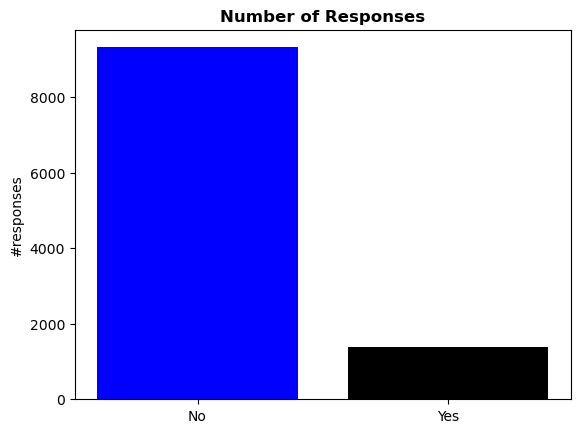

In [18]:
plt.bar(number_of_responses.index, number_of_responses, color=('blue','black'))
plt.title('Number of Responses', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["No","Yes"])
plt.ylabel("#responses")

In [23]:
#Show a plot of the response by the sales channel

sales_channel= categorical_df['sales_channel'].value_counts()

sales_channel

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

In [29]:
response_sales_channel=file1.groupby('sales_channel')['response'].value_counts()
response_sales_channel

sales_channel  response
agent          no          3340
               yes          679
branch         no          2665
               yes          310
call center    no          1890
               yes          209
web            no          1421
               yes          175
Name: response, dtype: int64

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

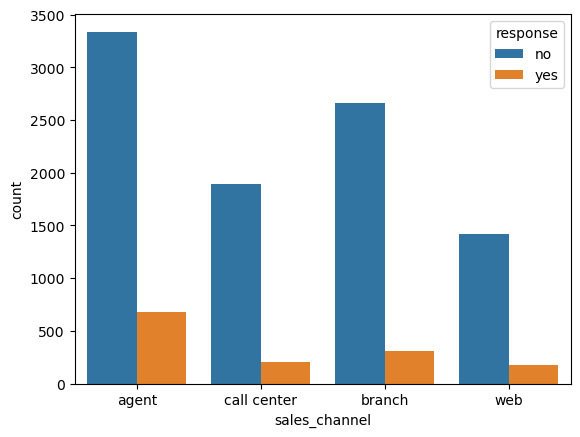

In [30]:
sns.countplot(x='sales_channel', hue='response' , data=file1)

In [31]:
#Show a plot of the response by the total claim amount 

total_claim_amount = numerical_df['total_claim_amount'].value_counts()
total_claim_amount

316     147
292     143
350     137
312     128
331     123
       ... 
816       1
1980      1
1543      1
1562      1
1621      1
Name: total_claim_amount, Length: 1172, dtype: int64

In [32]:
response_total_claim_amount = file1.groupby('total_claim_amount')['response'].value_counts()
response_total_claim_amount 

total_claim_amount  response
0                   no           9
1                   no           9
2                   no          12
3                   no           9
4                   no          12
                                ..
2345                no           1
2452                no           1
2552                no           2
2759                no           1
2893                no           1
Name: response, Length: 1363, dtype: int64